In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("Cricket.csv", encoding='latin1')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [ ]:
#Data inspection
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 79 entries, 0 to 78

Data columns (total 13 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   Player  79 non-null     object 

 1   Span    79 non-null     object 

 2   Mat     79 non-null     int64  

 3   Inns    79 non-null     int64  

 4   NO      79 non-null     int64  

 5   Runs    79 non-null     int64  

 6   HS      79 non-null     object 

 7   Ave     79 non-null     float64

 8   BF      79 non-null     int64  

 9   SR      79 non-null     float64

 10  100     79 non-null     int64  

 11  50      79 non-null     int64  

 12  0       79 non-null     int64  

dtypes: float64(2), int64(8), object(3)

memory usage: 8.1+ KB


In [ ]:
#As we observed span column is stored as object
# to convert the span into years of experience
# we first split the span into start and end and store in new column

df[['Strt','End']] = df.Span.str.split("-",expand=True)
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 79 entries, 0 to 78

Data columns (total 15 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   Player  79 non-null     object 

 1   Span    79 non-null     object 

 2   Mat     79 non-null     int64  

 3   Inns    79 non-null     int64  

 4   NO      79 non-null     int64  

 5   Runs    79 non-null     int64  

 6   HS      79 non-null     object 

 7   Ave     79 non-null     float64

 8   BF      79 non-null     int64  

 9   SR      79 non-null     float64

 10  100     79 non-null     int64  

 11  50      79 non-null     int64  

 12  0       79 non-null     int64  

 13  Strt    79 non-null     object 

 14  End     79 non-null     object 

dtypes: float64(2), int64(8), object(5)

memory usage: 9.4+ KB


In [ ]:
# convert them as int and
# find years of exp as end year - start year
# later drop the unneceassry columns such as start, end and span
# we are only left with the experience column now

df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']

In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End,Exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17


In [ ]:
df=df.drop(['Strt','End','Span'], axis = 1)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [ ]:
#now we will look for HS column
df2 = df['HS']

In [ ]:
df2.to_string()

'0     200*\n1      169\n2      164\n3      189\n4      144\n5     137*\n6      139\n7      183\n8      153\n9      169\n10    161*\n11    141*\n12     172\n13    183*\n14    153*\n15    162*\n16     145\n17     215\n18     194\n19     150\n20     150\n21    152*\n22    132*\n23     173\n24     219\n25     183\n26     175\n27     124\n28    134*\n29     130\n30    120*\n31    131*\n32    119*\n33     144\n34     159\n35     102\n36    145*\n37     141\n38    108*\n39    188*\n40     145\n41     143\n42    189*\n43    142*\n44    139*\n45    127*\n46    131*\n47     122\n48    174*\n49    181*\n50     166\n51     145\n52     122\n53     121\n54    140*\n55    119*\n56    120*\n57    124*\n58    113*\n59    185*\n60     154\n61    116*\n62     112\n63    237*\n64    109*\n65     264\n66     141\n67     119\n68    144*\n69    145*\n70    150*\n71    131*\n72    133*\n73    119*\n74    133*\n75     96*\n76    120*\n77     156\n78     112'

In [ ]:
#Same we will do with HS column as it contains extra '*' mark
df[['HS','extra']] = df.HS.str.split("*",expand=True)

In [ ]:
df['HS']=df['HS'].astype(int)
df=df.drop(['extra'], axis = 1)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [ ]:
#Data managing and cleaning
#Now we will check null values and duplicate values in our dataset
df.isnull().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
Exp       0
dtype: int64

In [ ]:
df[df.duplicated()].sum()

Player    0.0
Mat       0.0
Inns      0.0
NO        0.0
Runs      0.0
HS        0.0
Ave       0.0
BF        0.0
SR        0.0
100       0.0
50        0.0
0         0.0
Exp       0.0
dtype: float64

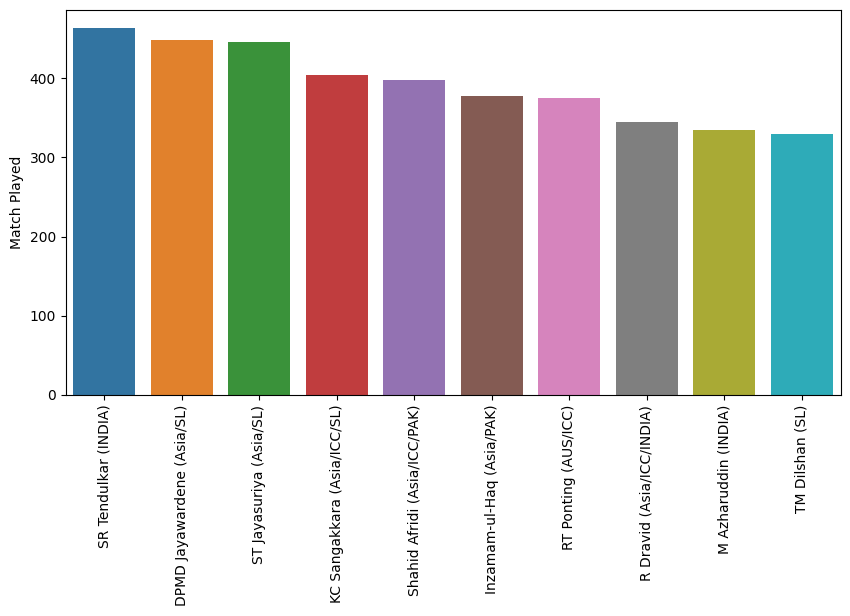

In [ ]:
#Visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
#Getting top 10 players according to matches played
plt.figure(figsize = (10,5))
mat_top10 = df[['Player','Mat']].sort_values('Sum of customer_allocated_canl', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Mat', data= mat_top10)
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

<ipython-input-22-a23600c7198c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

  sns.heatmap(df.corr(), annot = True, cmap="rainbow")


<Axes: >

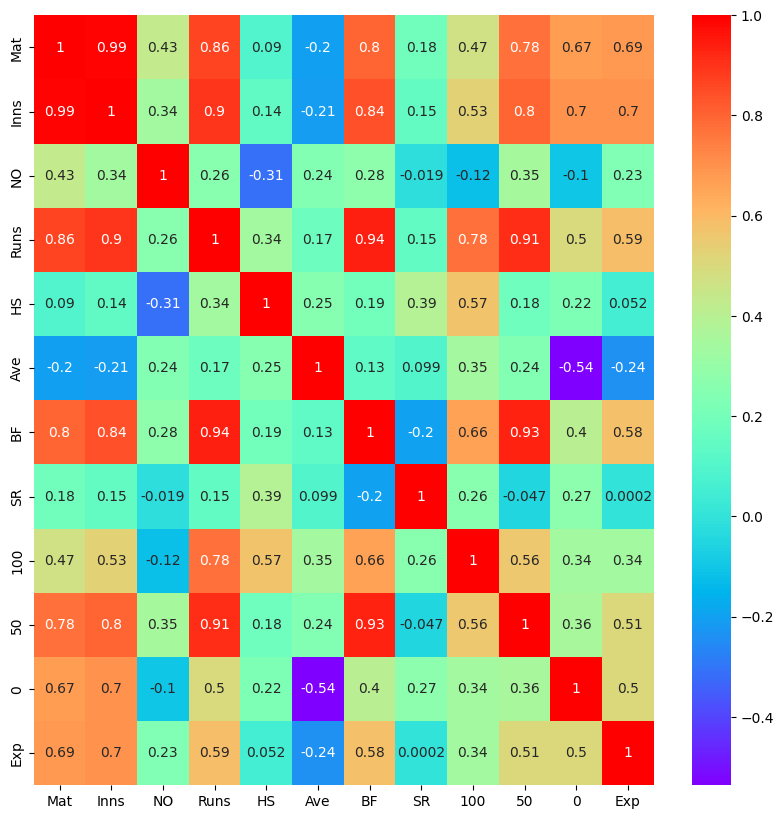

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")

<Axes: >

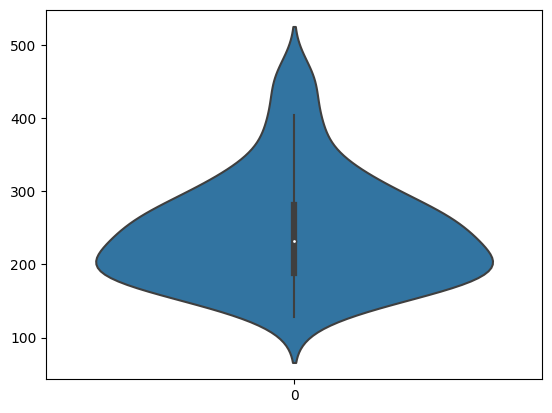

In [ ]:
sns.violinplot(df['Mat'])

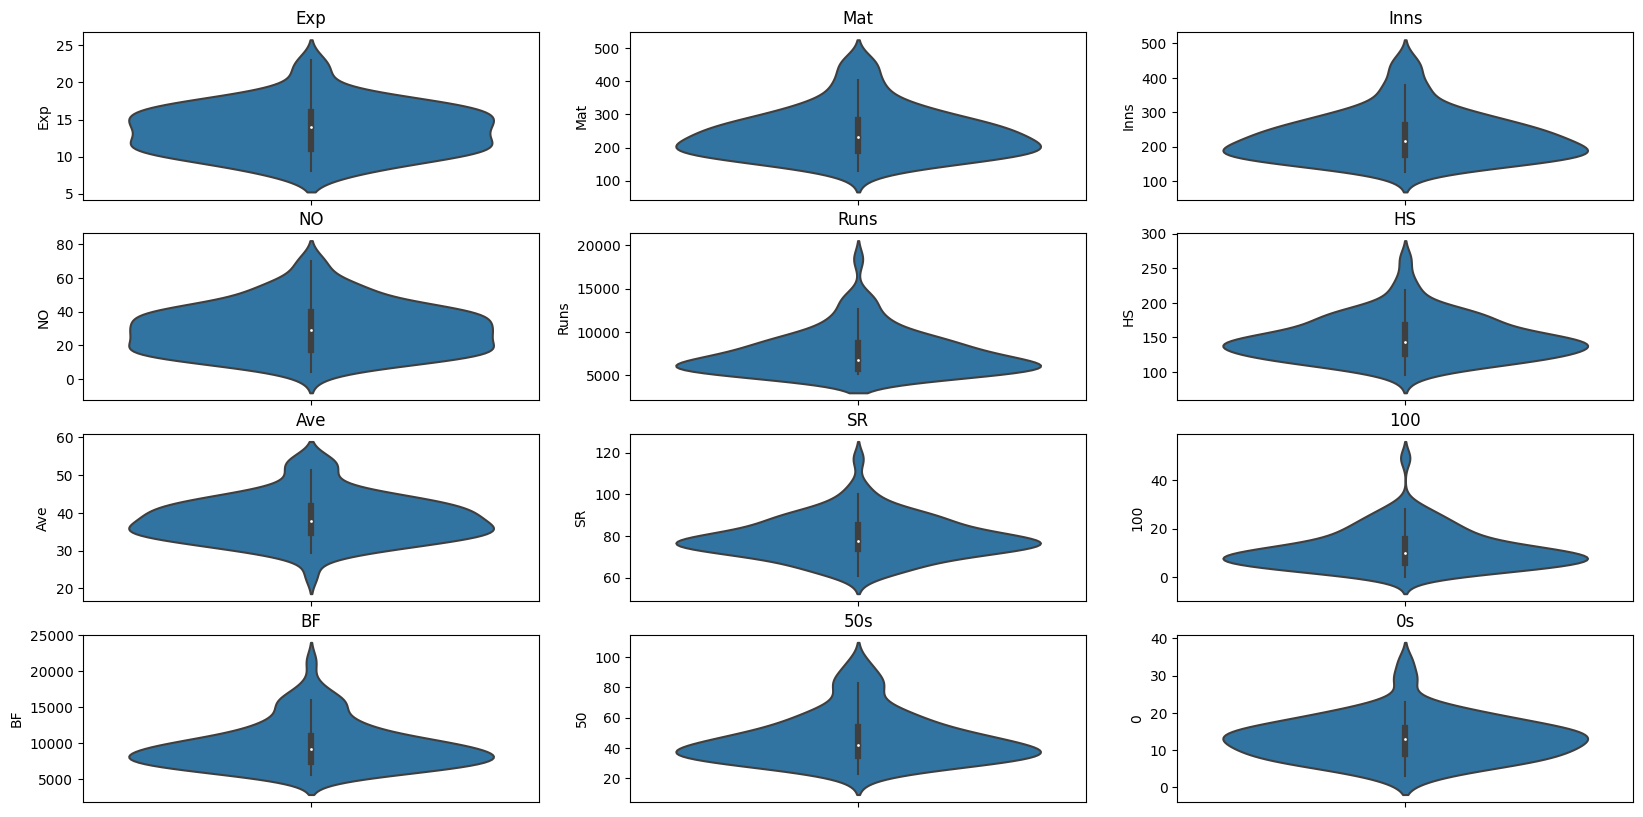

In [ ]:
f, axes = plt.subplots(4,3, figsize=(20, 10))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')

s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')

s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')

s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')

s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')

s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')

s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')

s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')

s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')

s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [ ]:
# Dropping Player field as final dataframe will only contain data columns

df_drop = df.copy()
player = df_drop.pop('Player')

In [ ]:
#Now let is rescale our data
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_drop)
pd.DataFrame(df_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.587674,-1.481860,-1.188961,-0.979677,-0.522838,1.106299,-0.559768,-1.457604,-0.069268,-0.950465,-1.741328,0.684919
75,-1.126598,-1.167010,0.067133,-0.984410,-1.713068,0.829159,-0.863213,-0.562275,-1.437319,-0.273453,-1.231828,-0.227024
76,-0.651961,-0.709047,0.485831,-0.996241,-0.941027,-0.537836,-0.967512,-0.234765,-0.815478,-1.258197,-1.061995,-1.138967
77,-0.638400,-0.995274,0.206699,-0.997819,0.217035,0.208570,-1.317278,1.332823,-0.691110,-1.012011,0.296671,-0.834986


In [ ]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [ ]:
df_df1 = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
df_df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


In [ ]:
#Now start KMeans
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kme

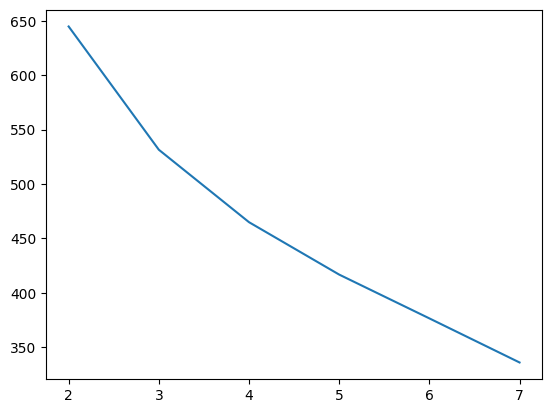

In [ ]:
# Elbow curve method to find the ideal number of clusters.
clusters=list(range(2,8))
ssd = []  #wcss
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_df1)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [ ]:
#K-means with k=4 clusters

cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(


KMeans(max_iter=150, n_clusters=4, random_state=15)

In [ ]:
# Cluster labels

cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 0, 0, 3, 0, 2, 3, 2,
       2, 2, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# Assign the label

df['Cluster_Id'] = cluster.labels_
df.head(20)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,1
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,1
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,1
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,1
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,1
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,1
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,1
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,1
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15,1
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,2


In [ ]:
df[df['Cluster_Id']==0].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Can be Batsman Coach

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
60,Tamim Iqbal (BDESH),173,171,4,5743,154,34.38,7333,78.31,9,38,16,10,0
37,GC Smith (Afr/SA),197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,0
70,G Gambhir (INDIA),147,143,11,5238,150,39.68,6144,85.25,11,34,11,10,0
54,Mohammad Hafeez (PAK),190,190,12,5876,140,33.01,7774,75.58,11,32,16,14,0
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,0


In [ ]:
X = df_df1.iloc[:, [3, 6]].values
X

array([[ 4.26232808,  3.68121424],
       [ 2.60911662,  2.63538469],
       [ 2.40009894,  2.31965067],
       [ 2.29204075,  1.58829472],
       [ 1.98442984,  1.99635416],
       [ 1.62515607,  1.93081256],
       [ 1.5620564 ,  1.95381514],
       [ 1.47687184,  1.80603146],
       [ 1.28993905,  1.76443775],
       [ 1.09906254,  1.07183957],
       [ 1.05370965,  0.70852488],
       [ 0.82891706,  1.02646463],
       [ 0.78908539,  0.07485112],
       [ 0.74057751,  0.3218925 ],
       [ 0.6940415 ,  0.94044129],
       [ 0.6707735 , -0.12271897],
       [ 0.65697044,  0.55412401],
       [ 0.63212495,  0.36222579],
       [ 0.47555888,  0.39499659],
       [ 0.45741773,  0.85819919],
       [ 0.42705101,  0.07548132],
       [ 0.40614924,  1.26751904],
       [ 0.35921886,  0.9168085 ],
       [ 0.34778204,  0.43123353],
       [ 0.25825938, -0.55315078],
       [ 0.20817401, -0.23079958],
       [ 0.18766662,  0.01151525],
       [ 0.17583543, -0.87991343],
       [ 0.16518736,

In [ ]:
y_kmeans = cluster.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

<Axes: xlabel='Not outs', ylabel='Average'>

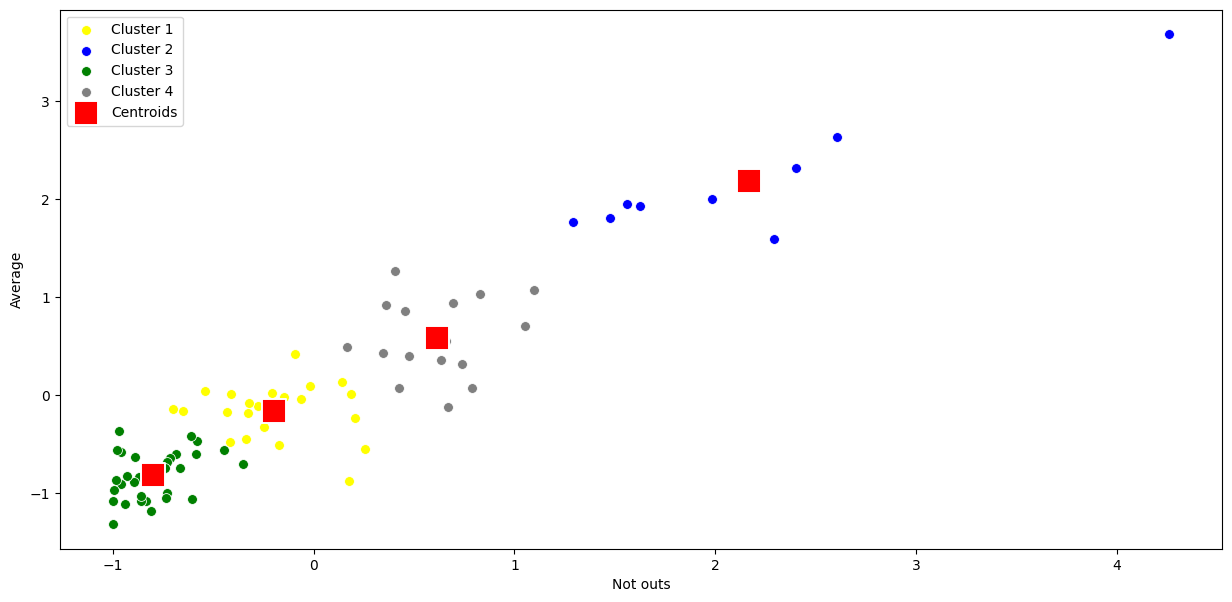

In [ ]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue',data = X, label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green',data = X, label = 'Cluster 3',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',data = X,  label= 'Cluster 4',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.xlabel("Not outs")
plt.ylabel("Average")
sns.scatterplot( x = cluster.cluster_centers_[0:4, 0], y =  cluster.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')